In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# creating arrays that of latitudes and longitudes 
# pack the latitudes and longitudes as pairs by zipping them with the zip() fxn

# Create a set of random latitude and longitude combinations 
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# zip memory above packs each pair of lats and lngs having the same index in their respective array into a tuple

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you
# unzip the latitudes and longitudes into the coordinates list before moving on

# display the coordinate pairs 
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

37.63248051630758 85.94632876010274
42.43081377389271 37.90888410209624
-64.9612059491799 65.08451670301159
-33.92321838351077 -55.20896123644337
49.53513885245741 120.71111821809916
-64.12673178567113 114.0226781180287
37.18444019537796 164.33870776193817
44.764166894710115 174.3341626477461
51.31431916718901 102.25707361733089
40.60496882918673 115.46018946747813
86.06516569006698 76.68213110279663
-35.424649039315085 128.4368467946888
-57.88616349812944 -43.57262237124462
-11.464776105310861 72.7154011736271
-2.380287642676521 -173.9766496274956
55.00306320972925 -77.02421713163332
67.81582654833286 90.02576678757976
45.062675748513044 26.73587488747839
-84.8778592087434 155.64093158668516
-57.956027350568554 18.013792987087584
51.65931353922005 155.34277094480592
38.47018626298777 8.793780862783734
67.05036504352043 -135.86846636088336
66.22076618651283 103.42127258358164
70.91826713414986 -126.78329135810513
-46.87095961531485 98.43211391124157
79.75880034460769 9.823578982966012


-51.410134905299735 -17.969679612805436
-39.91915804341744 -77.38054444933552
-47.892770294052625 163.272119588235
65.87593694217776 -32.24496802271915
22.71126206443246 71.10057060342172
4.1823709968410725 -97.12341485946972
-5.770042264869872 66.7963066253302
-84.35484717964 -39.7132852309108
-18.43276187839892 5.646399487358366
25.925996145428982 -8.424630548720302
-53.8319063103537 131.48582233823777
-48.89121545662737 -130.18712647073886
61.549643679394336 126.15188728073815
78.32127662881803 -62.76465735910098
38.918301734570775 158.83815711210264
-77.80574498685627 101.8145421651194
4.65280179296262 -122.36329443998346
-5.013874282188908 -59.64170673350739
-47.03571072061564 -110.89969627991135
-1.9358059043473475 -97.34478893370947
26.20823581255442 -78.90389410248993
-82.02737534010878 -79.07780681579588
16.9262185889352 58.95908101509542
-43.406266471790765 -109.76206998293462
81.16279305648519 72.84513811104432
32.46382708371999 130.63886066429092
-27.317549208352176 -117.79

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and long combination 
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list 
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count 
len(cities)

619

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea375d0306711e30293f0877525ad465


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list 
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city 
    city_url = url + "&q=" + cities[i]
print(city_url)

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record and set the numbers and the city 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record coun t 
    record_count += 1
    
    
# Run an APR request for each of the cities 
    try:
        # Parse the JSON and retrieve data 
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
# If an error is experienced, skip the city 
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea375d0306711e30293f0877525ad465&q=asosa
Processing Record 1 of Set 13 | korla
Processing Record 2 of Set 13 | unye
City not found. Skipping...
Processing Record 3 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 13 | minas
Processing Record 5 of Set 13 | yakeshi
Processing Record 6 of Set 13 | albany
Processing Record 7 of Set 13 | severo-kurilsk
Processing Record 8 of Set 13 | nikolskoye
Processing Record 9 of Set 13 | kyren
Processing Record 10 of Set 13 | xuanhua
Processing Record 11 of Set 13 | dikson
Processing Record 12 of Set 13 | flinders
Processing Record 13 of Set 13 | mar del plata
Processing Record 14 of Set 13 | hithadhoo
Processing Record 15 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 13 | moose factory
Processing Record 17 of Set 13 | svetlogorsk
Processing Record 18 of Set 13 | stalpu

Processing Record 28 of Set 16 | castro
Processing Record 29 of Set 16 | srandakan
Processing Record 30 of Set 16 | hovd
Processing Record 31 of Set 16 | georgetown
Processing Record 32 of Set 16 | hermanus
Processing Record 33 of Set 16 | abonnema
Processing Record 34 of Set 16 | puerto escondido
Processing Record 35 of Set 16 | waingapu
Processing Record 36 of Set 16 | balkhash
Processing Record 37 of Set 16 | straumen
Processing Record 38 of Set 16 | manggar
Processing Record 39 of Set 16 | hamilton
Processing Record 40 of Set 16 | amapa
Processing Record 41 of Set 16 | yar-sale
Processing Record 42 of Set 16 | kirakira
Processing Record 43 of Set 16 | nuqui
Processing Record 44 of Set 16 | agadir
Processing Record 45 of Set 16 | san policarpo
Processing Record 46 of Set 16 | padang
Processing Record 47 of Set 16 | beira
Processing Record 48 of Set 16 | axim
Processing Record 49 of Set 16 | berlevag
Processing Record 50 of Set 16 | husavik
Processing Record 1 of Set 17 | abu kamal
P

Processing Record 17 of Set 20 | gondar
Processing Record 18 of Set 20 | kalmunai
Processing Record 19 of Set 20 | sur
Processing Record 20 of Set 20 | luwuk
Processing Record 21 of Set 20 | san cristobal
Processing Record 22 of Set 20 | pervoavgustovskiy
Processing Record 23 of Set 20 | mangrol
Processing Record 24 of Set 20 | gunjur
Processing Record 25 of Set 20 | alofi
Processing Record 26 of Set 20 | karratha
Processing Record 27 of Set 20 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 20 | yeppoon
Processing Record 29 of Set 20 | mount isa
Processing Record 30 of Set 20 | abnub
Processing Record 31 of Set 20 | fonte boa
Processing Record 32 of Set 20 | half moon bay
Processing Record 33 of Set 20 | jaicos
Processing Record 34 of Set 20 | itoman
Processing Record 35 of Set 20 | sebrovo
Processing Record 36 of Set 20 | liling
Processing Record 37 of Set 20 | orocue
Processing Record 38 of Set 20 | kashi
Processing Record 39 of Set 20 | flagstaff
Processing Recor

Processing Record 1 of Set 24 | natal
Processing Record 2 of Set 24 | ouesso
Processing Record 3 of Set 24 | zavolzhsk
Processing Record 4 of Set 24 | goma
Processing Record 5 of Set 24 | susangerd
Processing Record 6 of Set 24 | umm bab
Processing Record 7 of Set 24 | wankaner
Processing Record 8 of Set 24 | namibe
Processing Record 9 of Set 24 | tiznit
Processing Record 10 of Set 24 | portland
Processing Record 11 of Set 24 | borba
Processing Record 12 of Set 24 | freeport
Processing Record 13 of Set 24 | salalah
Processing Record 14 of Set 24 | yatsushiro
Processing Record 15 of Set 24 | guerrero negro
Processing Record 16 of Set 24 | galesong
Processing Record 17 of Set 24 | bubaque
Processing Record 18 of Set 24 | oranjemund
Processing Record 19 of Set 24 | dingle
Processing Record 20 of Set 24 | kamareddi
Processing Record 21 of Set 24 | artyk
City not found. Skipping...
Processing Record 22 of Set 24 | oyama
Processing Record 23 of Set 24 | teguldet
Processing Record 24 of Set 2

In [12]:
len(city_data
   )

564

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Korla,41.7597,86.1469,87.39,23,100,16.78,CN,2022-07-28 23:40:43
1,Minas,-34.3759,-55.2377,49.05,72,98,17.40,UY,2022-07-28 23:40:44
2,Yakeshi,49.2833,120.7333,68.27,74,86,2.24,CN,2022-07-28 23:40:44
3,Albany,42.6001,-73.9662,81.34,68,74,3.00,US,2022-07-28 23:40:29
4,Severo-Kurilsk,50.6789,156.1250,55.45,87,86,9.04,RU,2022-07-28 23:38:59
5,Nikolskoye,59.7035,30.7861,58.80,89,91,3.74,RU,2022-07-28 23:40:46
6,Kyren,51.6828,102.1408,58.59,82,46,1.52,RU,2022-07-28 23:40:46
7,Xuanhua,40.6103,115.0447,73.65,74,3,3.29,CN,2022-07-28 23:40:47
8,Dikson,73.5069,80.5464,43.84,100,100,16.89,RU,2022-07-28 23:40:47
9,Flinders,-34.5833,150.8552,55.18,62,34,8.01,AU,2022-07-28 23:40:48


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = df[new_column_order]

In [21]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Korla,CN,2022-07-28 23:40:43,41.7597,86.1469,87.39,23,100,16.78
1,Minas,UY,2022-07-28 23:40:44,-34.3759,-55.2377,49.05,72,98,17.40
2,Yakeshi,CN,2022-07-28 23:40:44,49.2833,120.7333,68.27,74,86,2.24
3,Albany,US,2022-07-28 23:40:29,42.6001,-73.9662,81.34,68,74,3.00
4,Severo-Kurilsk,RU,2022-07-28 23:38:59,50.6789,156.1250,55.45,87,86,9.04


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Create a scatter plot for latitude vs maximum temp 

# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

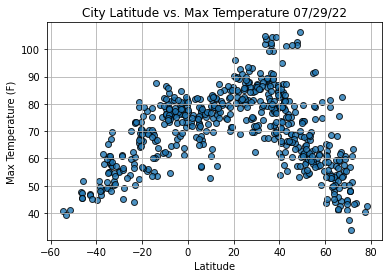

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

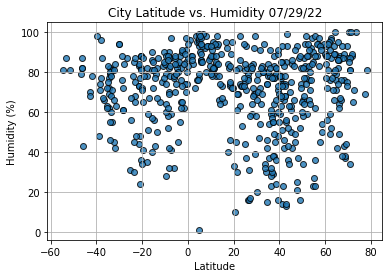

In [31]:
# Build the scatter plot for humidity vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

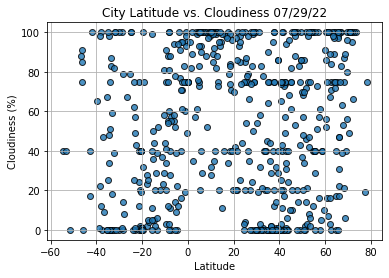

In [32]:
# Build the scatter plot for cloudiness vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

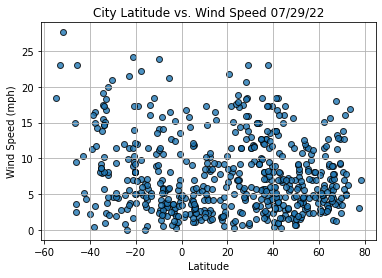

In [33]:
# Build the scatter plot for wind speed vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
# creating a new df from a current df, use loc method 
# loc method accesses a group of rows and columns in the current df by an index, labels or a Boolean array 
# output of below fxn will present all info at index 13 of the city data df 


index13 = city_data_df.loc[13]
index13

City                  Svetlogorsk
Country                        BY
Date          2022-07-28 23:40:50
Lat                       52.6333
Lng                       29.7333
Max Temp                    54.45
Humidity                       88
Cloudiness                     75
Wind Speed                   6.22
Name: 13, dtype: object

In [38]:
# can filter a df based on a value of the row 
# if we want to get all the northern hemisphere lats
# for lats greater than or equal to 0, we can filter the city_data_df 
# executing the code will return either True or False for all the rows that meet these criteria 


city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
559     True
560    False
561     True
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [41]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df
# Inside the brackets, we would add the conditional filter

city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Korla,CN,2022-07-28 23:40:43,41.7597,86.1469,87.39,23,100,16.78
2,Yakeshi,CN,2022-07-28 23:40:44,49.2833,120.7333,68.27,74,86,2.24
3,Albany,US,2022-07-28 23:40:29,42.6001,-73.9662,81.34,68,74,3.00
4,Severo-Kurilsk,RU,2022-07-28 23:38:59,50.6789,156.1250,55.45,87,86,9.04
5,Nikolskoye,RU,2022-07-28 23:40:46,59.7035,30.7861,58.80,89,91,3.74


In [42]:
# assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression
# We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.


# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

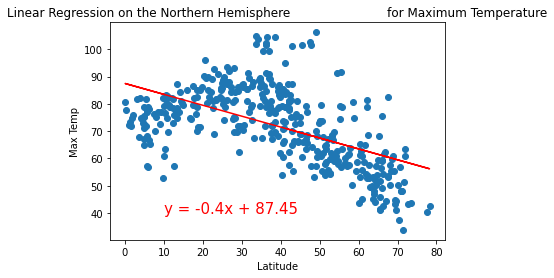

In [43]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

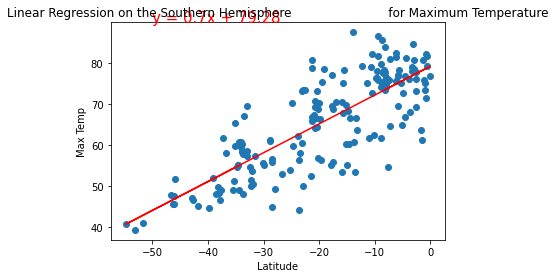

In [45]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [46]:
# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is 
# less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, 
# as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer.
# And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

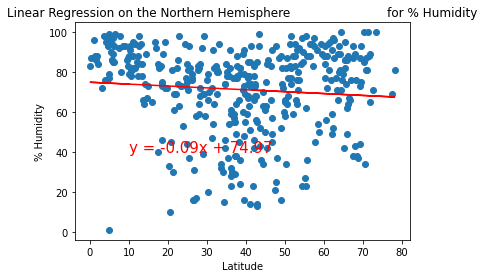

In [49]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10, 40))

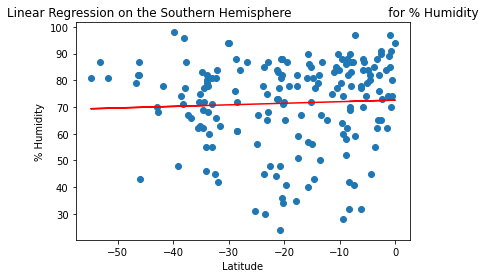

In [50]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [51]:
# The correlation 
# between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres 
# for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. 
# Check the r-values for your plots. 

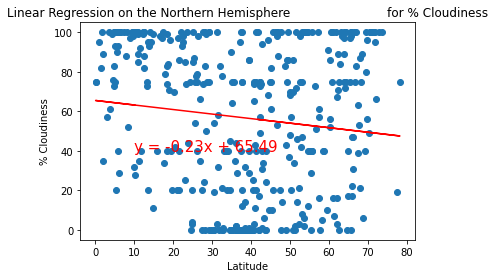

In [52]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10, 40))

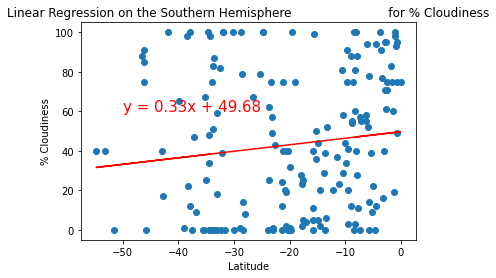

In [53]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [54]:
# r-value N. Hemi: -0.23 
# r-value S. Hemi: 0.33 

# Cloudiness is unpredicatable due to changing weather patterns that can increase or decrease percent cloudiness 

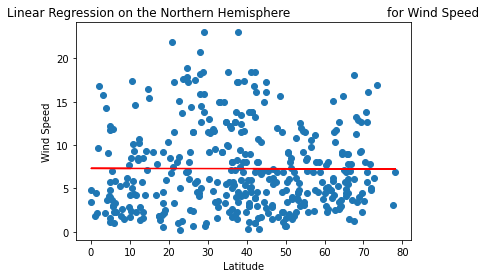

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

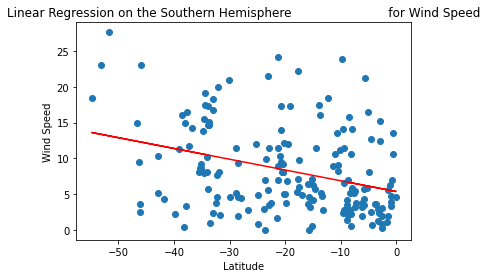

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))